In [1]:
!pip install rdkit-pypi
!pip install mordred

In [2]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

In [43]:
df = pd.read_csv('top10_smi.csv')
df.shape

(10, 1)

In [44]:
df.head()

,Smiles
0,C1=CC=C(C=C1)CC(=O)O
1,CCOC(=O)/C=C/C1=CC=CC=C1
2,CSCC=C
3,CCCCCC(C)O
4,CC1=CC(=CC=C1)O


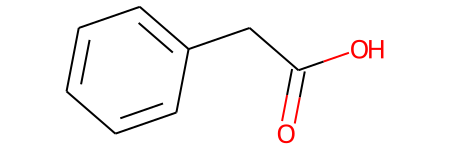

In [45]:
smiles = 'C1=CC=C(C=C1)CC(=O)O'
mol = Chem.MolFromSmiles(smiles)
print(mol)
mol

In [47]:
from rdkit.Chem import Draw

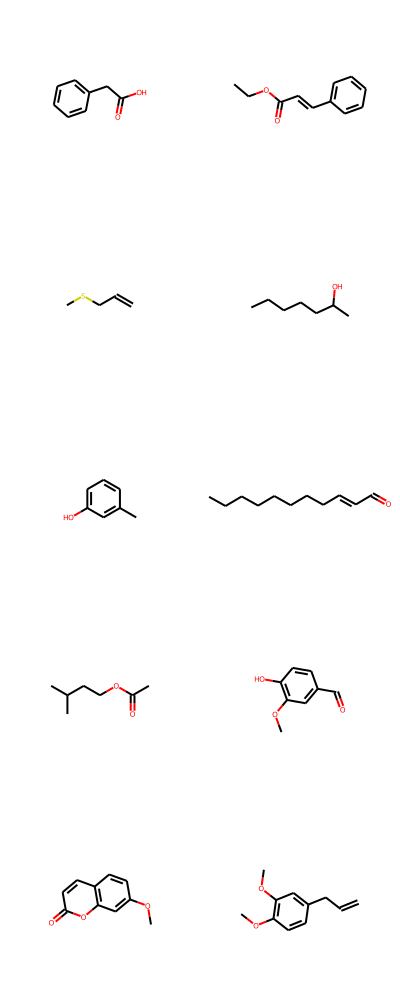

In [42]:
smiles = [
    'C1=CC=C(C=C1)CC(=O)O',
    'CCOC(=O)/C=C/C1=CC=CC=C1',
    'CSCC=C',
    'CCCCCC(C)O',
    'CC1=CC(=CC=C1)O',
    'CCCCCCCC\\C=C\\C=O',
    'CC(C)CCOC(C)=O',
    'COC1=C(C=CC(=C1)C=O)O',
    'COC1=CC2=C(C=C1)C=CC(=O)O2',
    'COC1=C(C=C(C=C1)CC=C)OC'
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
mols
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [49]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset['Smiles'])

In [50]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.125245,-2.990856,11.125245,0.690934,0.665180,136.150,128.086,136.052429,52,0,...,0,0,0,0,0,0,0,0,0,0
1,11.748664,-3.434072,11.748664,0.736674,0.521289,176.215,164.119,176.083730,68,0,...,0,0,0,0,0,0,0,0,0,0
2,7.102431,-2.578125,7.102431,0.056574,0.461235,88.175,80.111,88.034671,30,0,...,1,0,0,0,0,0,0,0,0,0
3,7.599583,-4.185417,7.599583,3.556256,0.556462,116.204,100.076,116.120115,50,0,...,0,0,0,0,0,0,0,0,0,0
4,7.452199,-2.745093,7.452199,0.618403,0.535935,108.140,100.076,108.057515,42,0,...,0,0,0,0,0,0,0,0,0,0
5,10.940298,-4.507546,10.940298,1.715452,0.307846,168.280,148.120,168.151415,70,0,...,0,0,0,0,0,0,0,0,0,0
6,11.219330,-4.099792,11.219330,2.203881,0.542210,130.187,116.075,130.099380,54,0,...,0,0,0,0,0,0,0,0,0,0
7,11.016183,-2.998603,11.016183,0.767477,0.647744,152.149,144.085,152.047344,58,0,...,0,0,0,0,0,0,0,0,0,0
8,11.381256,-2.953205,11.381256,0.381952,0.621753,176.171,168.107,176.047344,66,0,...,0,0,0,0,0,0,0,0,0,0
9,7.992292,-3.237838,7.992292,1.035517,0.659125,178.231,164.119,178.099380,70,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [55]:
Morgan_fpts = morgan_fpts(dataset['Smiles'])
Morgan_fpts.shape

(10, 2048)

In [58]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [60]:
mordred_descriptors = All_Mordred_descriptors(dataset['Smiles'])

100%|██████████| 10/10 [00:01<00:00,  8.79it/s]


In [61]:
mordred_descriptors.shape

(10, 1826)

In [62]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,7.289847,6.783462,1,0,12.066822,2.175328,4.350655,12.066822,1.206682,3.188073,...,8.564268,38.519688,136.052429,7.558468,126,9,44.0,46.0,3.722222,2.333333
1,9.301778,8.408609,0,0,16.330127,2.175328,4.350655,16.330127,1.256164,3.436887,...,8.743053,42.596927,176.083730,7.043349,290,13,56.0,59.0,4.472222,3.166667
2,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,6.192362,25.583106,88.034671,6.771898,20,2,14.0,12.0,2.750000,1.500000
3,5.168527,5.361851,0,0,8.762573,1.949856,3.899712,8.762573,1.095322,2.887985,...,7.475906,33.090360,116.120115,4.838338,79,5,28.0,26.0,4.111111,2.083333
4,5.875634,5.566041,0,0,9.431148,2.175328,4.350655,9.431148,1.178893,2.979741,...,8.479907,35.755147,108.057515,6.753595,61,7,36.0,38.0,3.222222,1.833333
5,7.778175,7.252425,0,0,14.592460,1.941884,3.883767,14.592460,1.216038,3.291100,...,7.720018,38.766486,168.151415,5.254732,286,9,42.0,40.0,4.500000,3.250000
6,6.094413,6.172092,0,0,9.464102,2.000000,4.000000,9.464102,1.051567,3.017479,...,7.838738,35.380270,130.099380,5.656495,108,6,34.0,32.0,4.972222,2.166667
7,7.847124,7.585047,0,0,13.665822,2.283101,4.566202,13.665822,1.242347,3.287086,...,8.997518,40.726374,152.047344,8.002492,154,14,50.0,56.0,4.583333,2.694444
8,9.968445,8.503875,0,0,16.854884,2.365948,4.731897,16.854884,1.296530,3.498044,...,9.417273,44.361071,176.047344,8.383207,238,18,66.0,76.0,4.194444,2.944444
9,9.151948,8.695006,0,0,16.275865,2.305441,4.610882,16.275865,1.251990,3.444711,...,9.124456,43.404376,178.099380,6.596273,256,17,58.0,65.0,5.083333,3.277778


In [64]:
mordred_descriptors.to_csv('top10Modred.csv')